In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata

In [2]:
df = pd.read_excel("../crawl_data/data/data_phone.xlsx")

> Số dòng và số cột

In [3]:
df.info

<bound method DataFrame.info of            id            sku  \
0   278237932  5930715677100   
1   278098703  5570280517992   
2   278000720  6457781969624   
3   277930407  8695120714637   
4   277777809  4865918741583   
..        ...            ...   
95  276500230  9726873983885   
96  276489194  8670921539579   
97  276465090  4986144121406   
98  276099688  4715753658238   
99  276062770  3230853088183   

                                                 name  \
0       Điện thoại Xiaomi Redmi 14C - Hàng chính hãng   
1   Điện thoại POCO C75 (8GB/256GB) - Hàng Chính Hãng   
2   Điện thoại HONOR X5b Plus 4GB/128GB - Hàng chí...   
3   Điện thoại Tecno Spark GO 1 (3GB/64GB) - Hàng ...   
4   Điện thoại Samsung Galaxy A26 5G (8/128GB), Mặ...   
..                                                ...   
95  Máy đọc sách Kindle Colorsoft Signature Editio...   
96  Điện thoại Samsung Galaxy S24 FE - Hàng chính ...   
97  Combo Máy đọc sách Amazon Kindle Paperwhite 6 ...   
98  Xiaomi Re

> Xem dữ liệu

10 dòng đầu

In [4]:
df.head(10)

,id,sku,name,url_key,url_path,type,author_name,book_cover,brand_name,short_description,...,badges_new_7_text,badges_new_8_arr_text_0_value,badges_new_8_code,badges_new_8_placement,badges_new_8_text_color,badges_new_8_type,visible_impression_info_amplitude_discounted_by_rule_ids,badges_new_8_arr_text_1_value,badges_new_6_arr_text_1_value,quantity_sold
0,278237932,5930715677100,Điện thoại Xiaomi Redmi 14C - Hàng chính hãng,dien-thoai-xiaomi-redmi-14c-hang-chinh-hang-p2...,dien-thoai-xiaomi-redmi-14c-hang-chinh-hang-p2...,NaN,NaN,NaN,Xiaomi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,278098703,5570280517992,Điện thoại POCO C75 (8GB/256GB) - Hàng Chính Hãng,dien-thoai-poco-c75-8gb-256gb-hang-chinh-hang-...,dien-thoai-poco-c75-8gb-256gb-hang-chinh-hang-...,NaN,NaN,NaN,POCO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,278000720,6457781969624,Điện thoại HONOR X5b Plus 4GB/128GB - Hàng chí...,dien-thoai-honor-x5b-plus-4gb-128gb-hang-chinh...,dien-thoai-honor-x5b-plus-4gb-128gb-hang-chinh...,NaN,NaN,NaN,Honor,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,277930407,8695120714637,Điện thoại Tecno Spark GO 1 (3GB/64GB) - Hàng ...,dien-thoai-tecno-spark-go-1-3gb-64gb-hang-chin...,dien-thoai-tecno-spark-go-1-3gb-64gb-hang-chin...,NaN,NaN,NaN,Tecno,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,277777809,4865918741583,"Điện thoại Samsung Galaxy A26 5G (8/128GB), Mặ...",dien-thoai-samsung-galaxy-a26-5g-8-128gb-mat-l...,dien-thoai-samsung-galaxy-a26-5g-8-128gb-mat-l...,NaN,NaN,NaN,Samsung,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,277619147,2298537289593,Máy tính bảng iPad Gen 11 (A16) WiFi,may-tinh-bang-ipad-gen-11-a16-wifi-p277619147,may-tinh-bang-ipad-gen-11-a16-wifi-p277619147....,NaN,NaN,NaN,Apple,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,277614251,7830659211948,Apple iPad Air M3 11-Inch Wi-Fi,apple-ipad-air-m3-11-inch-wi-fi-p277614251,apple-ipad-air-m3-11-inch-wi-fi-p277614251.htm...,NaN,NaN,NaN,Apple,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,277574339,8464975672091,Củ Sạc Samsung Không Kèm Cáp 25W - Hàng Chính ...,cu-sac-samsung-khong-kem-cap-25w-hang-chinh-ha...,cu-sac-samsung-khong-kem-cap-25w-hang-chinh-ha...,NaN,NaN,NaN,Samsung,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,277465334,2475765286149,Điện Thoại Samsung Galaxy A56 5G - Hàng Chính ...,dien-thoai-samsung-galaxy-a56-5g-hang-chinh-ha...,dien-thoai-samsung-galaxy-a56-5g-hang-chinh-ha...,NaN,NaN,NaN,Samsung,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,277360579,5340474104897,Điện Thoại Xiaomi Redmi 13 8GB/128GB - Hàng Ch...,dien-thoai-xiaomi-redmi-13-8gb-128gb-hang-chin...,dien-thoai-xiaomi-redmi-13-8gb-128gb-hang-chin...,NaN,NaN,NaN,Xiaomi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


10 dòng cuối

In [5]:
df.tail(10)

,id,sku,name,url_key,url_path,type,author_name,book_cover,brand_name,short_description,...,badges_new_7_text,badges_new_8_arr_text_0_value,badges_new_8_code,badges_new_8_placement,badges_new_8_text_color,badges_new_8_type,visible_impression_info_amplitude_discounted_by_rule_ids,badges_new_8_arr_text_1_value,badges_new_6_arr_text_1_value,quantity_sold
90,277175955,9345106409071,Điện Thoại Xiaomi Redmi A3 3GB/64GB - Hàng Chí...,dien-thoai-xiaomi-redmi-a3-3gb-64gb-hang-chinh...,dien-thoai-xiaomi-redmi-a3-3gb-64gb-hang-chinh...,NaN,NaN,NaN,Xiaomi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,277030799,5592063488795,"Điện thoại Realme Note 50 , Màn 90HZ (3GB/64GB...",dien-thoai-realme-note-50-3gb-64gb-rom-quoc-te...,dien-thoai-realme-note-50-3gb-64gb-rom-quoc-te...,NaN,NaN,NaN,Realme,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,276944868,4854793863713,Điện Thoại Samsung Galaxy A16 4GB/128GB - Hàng...,dien-thoai-samsung-a16-4gb-128gb-hang-chinh-ha...,dien-thoai-samsung-a16-4gb-128gb-hang-chinh-ha...,NaN,NaN,NaN,Samsung,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,276925932,2691391276900,Điện thoại Samsung Galaxy A16 LTE - Hàng chính...,samsung-galaxy-a16-lte-hang-chinh-hang-p276925932,samsung-galaxy-a16-lte-hang-chinh-hang-p276925...,NaN,NaN,NaN,Samsung,NaN,...,1 quà,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343344.0,2 Phân loại,NaN,NaN
94,276802409,6390362686360,Điện thoại Samsung Galaxy A16 5G - Hàng chính ...,dien-thoai-samsung-galaxy-a16-5g-hang-chinh-ha...,dien-thoai-samsung-galaxy-a16-5g-hang-chinh-ha...,NaN,NaN,NaN,Samsung,NaN,...,1 quà,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343345.0,1 Dung lượng,NaN,NaN
95,276500230,9726873983885,Máy đọc sách Kindle Colorsoft Signature Editio...,may-doc-sach-kindle-colorsoft-signature-editio...,may-doc-sach-kindle-colorsoft-signature-editio...,NaN,NaN,NaN,Kindle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,276489194,8670921539579,Điện thoại Samsung Galaxy S24 FE - Hàng chính ...,dien-thoai-samsung-galaxy-s24-fe-hang-chinh-ha...,dien-thoai-samsung-galaxy-s24-fe-hang-chinh-ha...,NaN,NaN,NaN,Samsung,NaN,...,1 quà,2 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343347.0,1 Dung lượng,NaN,NaN
97,276465090,4986144121406,Combo Máy đọc sách Amazon Kindle Paperwhite 6 ...,combo-may-doc-sach-amazon-kindle-paperwhite-6-...,combo-may-doc-sach-amazon-kindle-paperwhite-6-...,NaN,NaN,NaN,Kindle,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,276099688,4715753658238,"Xiaomi Redmi Note 12 5G 8GB/128GB ,Màn AMOLED ...",xiaomi-redmi-note-12-5g-8gb-128gb-man-amoled-1...,xiaomi-redmi-note-12-5g-8gb-128gb-man-amoled-1...,NaN,NaN,NaN,Xiaomi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,276062770,3230853088183,Điện Thoại Xiaomi Redmi 14C 4GB/128GB - Hàng C...,dien-thoai-xiaomi-redmi-14c-4gb-128gb-hang-chi...,dien-thoai-xiaomi-redmi-14c-4gb-128gb-hang-chi...,NaN,NaN,NaN,Xiaomi,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Xem kiểu dữ liệu

In [6]:
df.dtypes

id                                                            int64
sku                                                           int64
name                                                         object
url_key                                                      object
url_path                                                     object
                                                             ...   
badges_new_8_type                                            object
visible_impression_info_amplitude_discounted_by_rule_ids    float64
badges_new_8_arr_text_1_value                                object
badges_new_6_arr_text_1_value                                object
quantity_sold                                               float64
Length: 198, dtype: object

Xem phân phối chuẩn

In [7]:
df.describe()

,id,sku,type,author_name,book_cover,short_description,price,list_price,badges_new_0_icon_height,badges_new_0_icon_width,...,badges_new_3_icon_width,badges_new_5_promotions_0_icon_height,badges_new_5_promotions_0_icon_width,visible_impression_info_amplitude_combo_deal_id,badges_new_6_icon_height,badges_new_6_icon_width,badges_new_7_images_0_image_height,badges_new_7_images_0_image_width,visible_impression_info_amplitude_discounted_by_rule_ids,quantity_sold
count,1.000000e+02,1.000000e+02,0.0,0.0,0.0,0.0,1.000000e+02,100.0,100.000000,100.000000,...,6.0,1.0,1.0,1.0,8.0,8.0,8.0,8.0,1.200000e+01,0.0
mean,2.582560e+08,5.880416e+12,NaN,NaN,NaN,NaN,6.011725e+06,0.0,19.000000,74.750000,...,32.0,16.0,16.0,69022.0,16.0,32.0,32.0,32.0,3.343344e+06,NaN
std,4.806957e+07,2.522223e+12,NaN,NaN,NaN,NaN,6.343061e+06,0.0,1.740777,24.806066,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.315953e+00,NaN
min,1.125177e+07,1.003500e+12,NaN,NaN,NaN,NaN,1.500000e+05,0.0,16.000000,32.000000,...,32.0,16.0,16.0,69022.0,16.0,32.0,32.0,32.0,3.343341e+06,NaN
25%,2.743521e+08,4.198595e+12,NaN,NaN,NaN,NaN,2.356750e+06,0.0,19.000000,74.750000,...,32.0,16.0,16.0,69022.0,16.0,32.0,32.0,32.0,3.343341e+06,NaN
50%,2.765772e+08,5.748496e+12,NaN,NaN,NaN,NaN,3.590000e+06,0.0,20.000000,89.000000,...,32.0,16.0,16.0,69022.0,16.0,32.0,32.0,32.0,3.343344e+06,NaN
75%,2.774447e+08,7.940204e+12,NaN,NaN,NaN,NaN,7.102500e+06,0.0,20.000000,89.000000,...,32.0,16.0,16.0,69022.0,16.0,32.0,32.0,32.0,3.343345e+06,NaN
max,2.782379e+08,9.947657e+12,NaN,NaN,NaN,NaN,3.025000e+07,0.0,20.000000,89.000000,...,32.0,16.0,16.0,69022.0,16.0,32.0,32.0,32.0,3.343347e+06,NaN


> Tỉ lệ giá trị thiếu

In [8]:
df.isnull().sum()

id                                                            0
sku                                                           0
name                                                          0
url_key                                                       0
url_path                                                      0
                                                           ... 
badges_new_8_type                                            92
visible_impression_info_amplitude_discounted_by_rule_ids     88
badges_new_8_arr_text_1_value                                96
badges_new_6_arr_text_1_value                                98
quantity_sold                                               100
Length: 198, dtype: int64

In [9]:
num_missing_cols = (df.isnull().sum() > 0).sum()
print("Số cột có giá trị thiếu:", num_missing_cols)

Số cột có giá trị thiếu: 91


In [10]:
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

missing_table = pd.DataFrame({
    "Cột": missing_summary.index,
    "Số lượng thiếu": missing_summary.values,
    "Tỉ lệ thiếu (%)": (missing_summary.values / len(df)) * 100
}).sort_values(by="Số lượng thiếu", ascending=False).reset_index(drop=True)

print(missing_table)

                                         Cột  Số lượng thiếu  Tỉ lệ thiếu (%)
0                                       type             100            100.0
1                           inventory_status             100            100.0
2                                author_name             100            100.0
3                              advertisement             100            100.0
4                 impression_info_0_checksum             100            100.0
..                                       ...             ...              ...
86                         badges_new_3_code               8              8.0
87                    badges_new_3_placement               8              8.0
88                         badges_new_3_text               8              8.0
89                         badges_new_3_type               8              8.0
90  visible_impression_info_amplitude_origin               2              2.0

[91 rows x 3 columns]


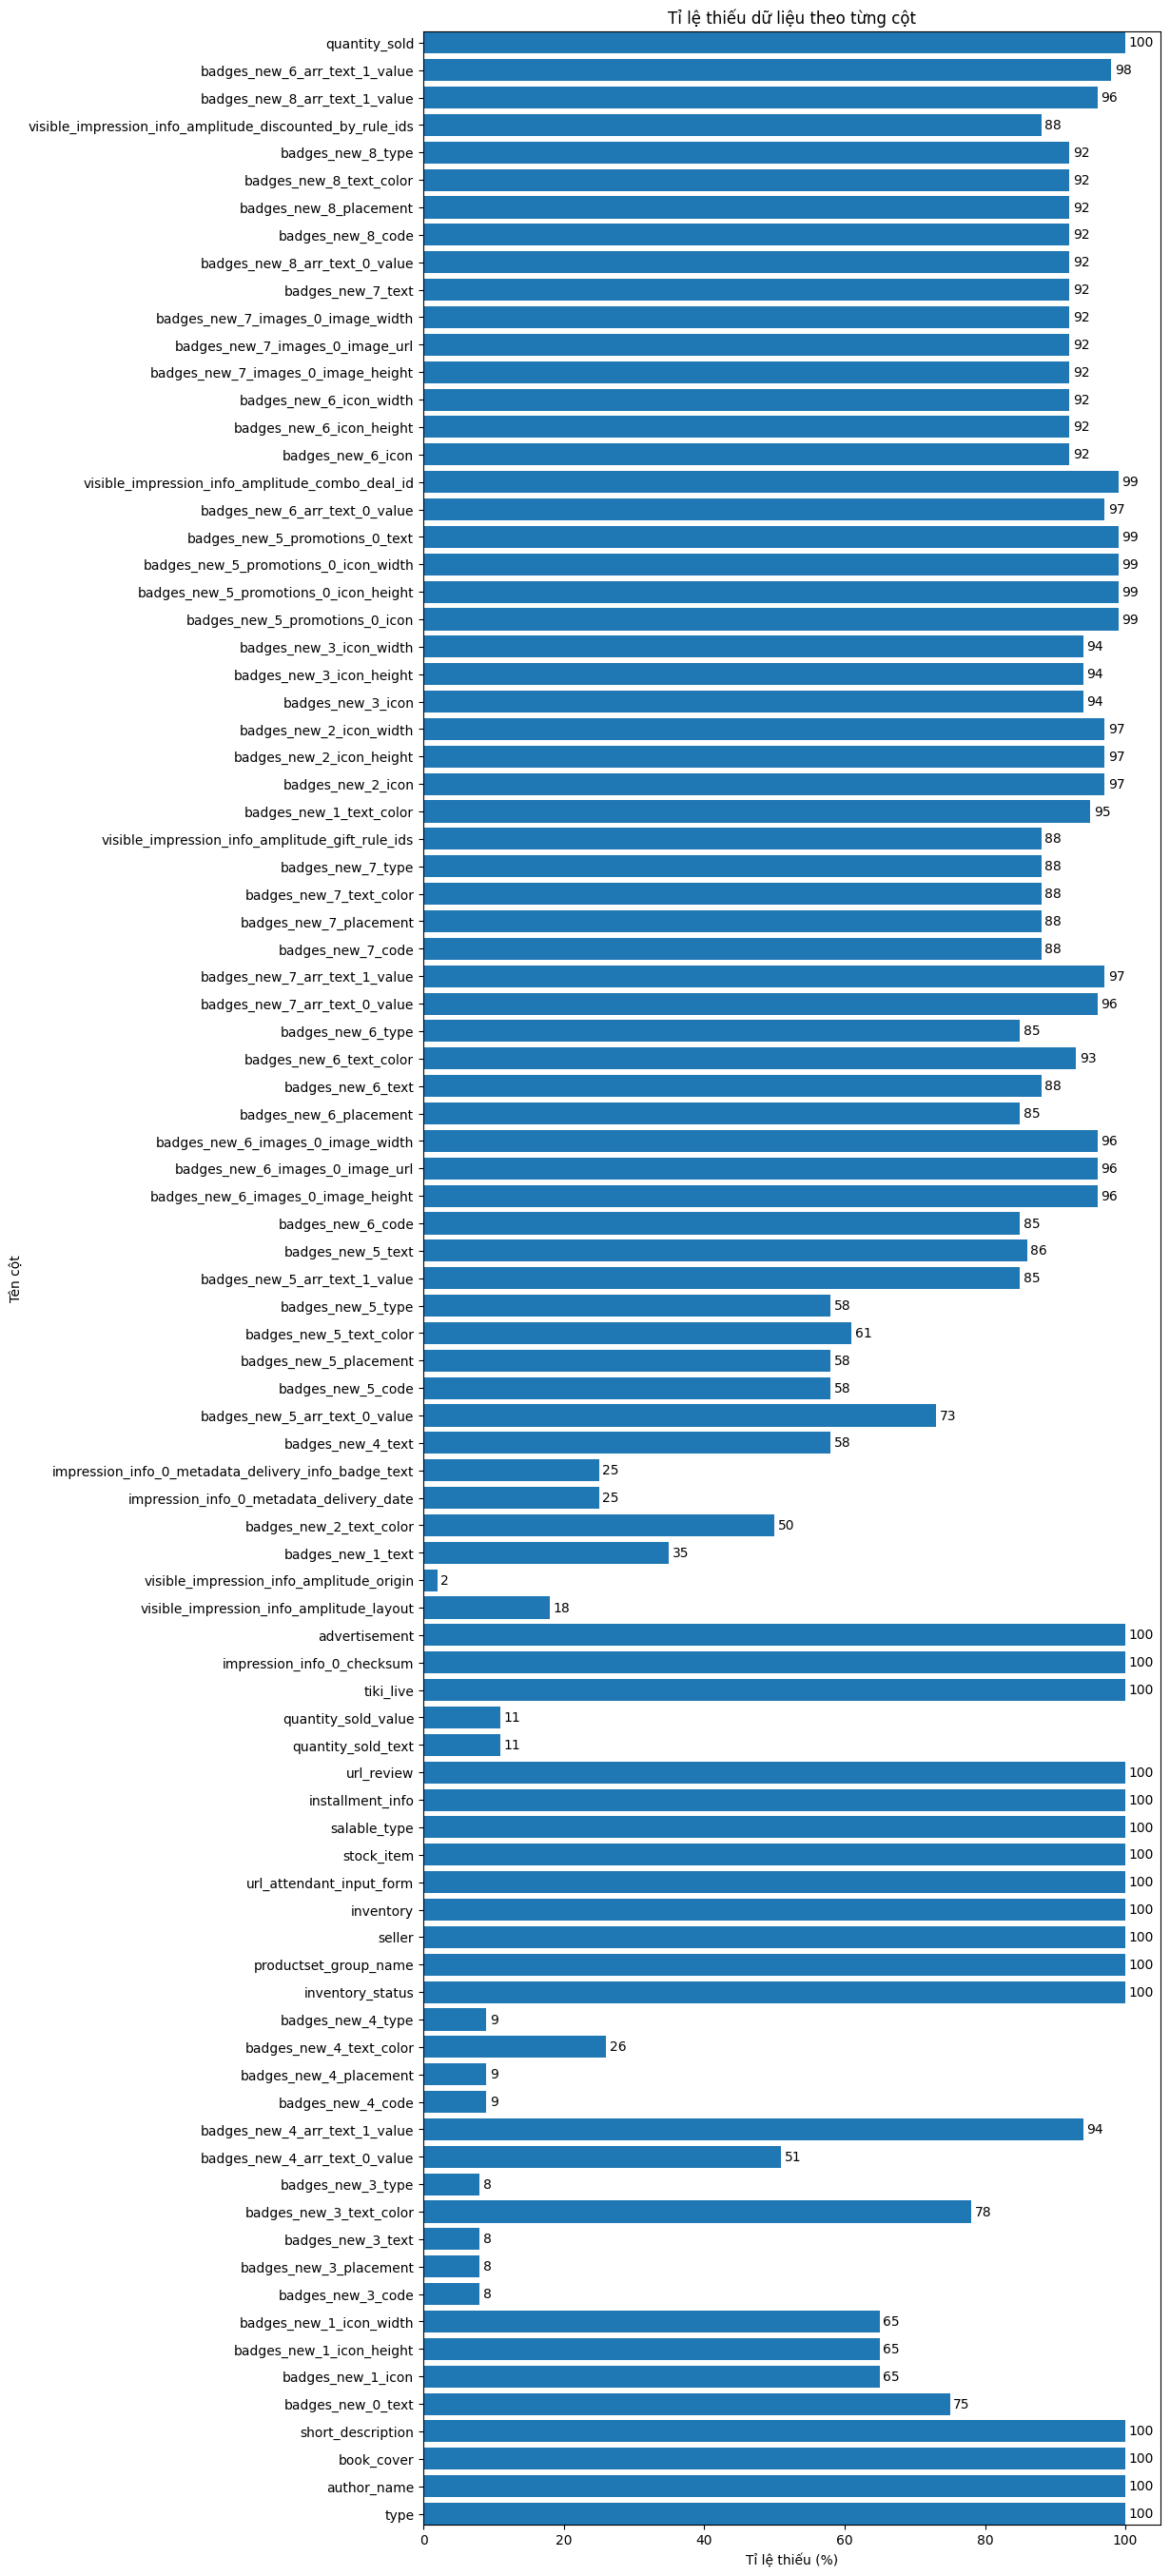

In [11]:
missing_ratio = (missing_summary / len(df)) * 100

plt.figure(figsize=(10, len(missing_ratio) * 0.3))
bars = plt.barh(missing_ratio.index, missing_ratio.values)

plt.xlabel("Tỉ lệ thiếu (%)")
plt.ylabel("Tên cột")
plt.title("Tỉ lệ thiếu dữ liệu theo từng cột")

for bar, val in zip(bars, missing_summary.values):
    plt.text(
        bar.get_width() + 0.5,
        bar.get_y() + bar.get_height()/2,
        str(val),
        va='center'
    )
plt.margins(y=0)
plt.subplots_adjust(top=0.98, bottom=0.02)
plt.show()

# ***CLEANING***

***Bước làm sạch dữ liệu***

Xử lý giá trị thiếu (missing values)

Nếu cột thiếu toàn bộ hoặc >95% thì drop.
Nếu cột quan trọng nhưng thiếu ít → thay thế (mean/median cho số, mode cho categorical).

In [12]:
# Ngưỡng drop cột theo tỷ lệ thiếu
MISSING_COL_THRESHOLD = 0.95  # >95% thiếu thì drop

def strip_accents_lower(s):
    if pd.isna(s): return s
    s = str(s).strip().lower()
    nfkd = unicodedata.normalize("NFKD", s)
    return "".join([c for c in nfkd if not unicodedata.combining(c)])

def to_num(x):
    """Bóc tách số từ chuỗi (ưu tiên VNĐ là số nguyên), lỗi -> NaN."""
    if pd.isna(x): return np.nan
    s = str(x)
    try:
        return float(s)
    except:
        pass
    s = re.sub(r"[^\d.]", "", s)
    if s.count(".") > 1:  # nghi ngờ dấu . là ngăn cách nghìn
        s = s.replace(".", "")
    try:
        return float(s) if s else np.nan
    except:
        return np.nan

print("Kích thước ban đầu:", df.shape)

Kích thước ban đầu: (100, 198)


In [13]:
def parse_price(x):
    """Giữ lại chữ số và chuyển về float; trống -> NaN."""
    if pd.isna(x):
        return np.nan
    s = re.sub(r"[^\d]", "", str(x))
    return float(s) if s else np.nan

def strip_accents_lower(s):
    """Chuẩn hóa text: bỏ dấu, lowercase, strip khoảng trắng."""
    if pd.isna(s):
        return s
    s = str(s).strip().lower()
    nfkd = unicodedata.normalize("NFKD", s)
    return "".join([c for c in nfkd if not unicodedata.combining(c)])

In [14]:
df_clean = df.copy()

In [15]:
# Drop cột có tỷ lệ thiếu > ngưỡng

null_ratio = df_clean.isna().mean()
drop_cols = list(null_ratio[null_ratio > MISSING_COL_THRESHOLD].index)
df_clean = df_clean.drop(columns=drop_cols)
print(f"Đã drop {len(drop_cols)} cột thiếu > {int(MISSING_COL_THRESHOLD*100)}%")
print("Sau drop cột:", df_clean.shape)

Đã drop 33 cột thiếu > 95%
Sau drop cột: (100, 165)


In [16]:
for key_col in ["id","name"]:
    if key_col in df_clean.columns:
        before = len(df_clean)
        df_clean = df_clean[df_clean[key_col].notna()]
        print(f"Loại {before-len(df_clean)} hàng thiếu '{key_col}'")

Loại 0 hàng thiếu 'id'
Loại 0 hàng thiếu 'name'


In [17]:
# Loại trùng lặp theo id (nếu có), nếu không có id thì thử theo (name, brand)
if "id" in df_clean.columns:
    before = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=["id"])
    print("Drop duplicates theo 'id':", before - len(df_clean))
elif set(["name","brand_name"]).issubset(df_clean.columns):
    before = len(df_clean)
    df_clean = df_clean.drop_duplicates(subset=["name","brand_name"])
    print("Drop duplicates theo (name, brand_name):", before - len(df_clean))

print("Kích thước hiện tại:", df_clean.shape)

Drop duplicates theo 'id': 0
Kích thước hiện tại: (100, 165)


In [18]:
# Giá: 'price', 'list_price' -> float
for col in ["price", "list_price"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].apply(parse_price)

In [19]:
if set(["price","list_price"]).issubset(df_clean.columns):
    df_clean["discount_percent"] = np.where(
        df_clean["list_price"].gt(0) & df_clean["price"].notna(),
        (df_clean["list_price"] - df_clean["price"]) / df_clean["list_price"] * 100.0,
        np.nan
    )

In [20]:
# %%
def choose_best_column(frame, candidates):
    avail = [c for c in candidates if c in frame.columns]
    if not avail: return None
    nn = {c: frame[c].notna().sum() for c in avail}
    return max(nn, key=nn.get)

def coalesce(series_list):
    out = None
    for s in series_list:
        if s is None: 
            continue
        out = s if out is None else out.combine_first(s)
    return out

price_candidates      = ["price","final_price","sale_price","deal_price","current_price","best_price"]
list_price_candidates = ["list_price","original_price","price_before_discount","regular_price","old_price","reference_price"]
rate_candidates       = ["discount_rate","discount_percent","discountPercentage","discount_percent_api"]
abs_disc_candidates   = ["discount","discount_amount","price_discount","saved_amount"]

price_col      = choose_best_column(df_clean, price_candidates)
list_price_col = choose_best_column(df_clean, list_price_candidates)
rate_col       = choose_best_column(df_clean, rate_candidates)
abs_col        = choose_best_column(df_clean, abs_disc_candidates)

print("Cột phát hiện:")
print(" - price      :", price_col)
print(" - list_price :", list_price_col)
print(" - rate(%)    :", rate_col)
print(" - discount₫  :", abs_col)

# Ép kiểu số
if price_col:      df_clean["_price_fix"]      = pd.to_numeric(df_clean[price_col].map(to_num), errors="coerce")
if list_price_col: df_clean["_list_price_fix"] = pd.to_numeric(df_clean[list_price_col].map(to_num), errors="coerce")
if rate_col:       df_clean["_rate_fix"]       = pd.to_numeric(df_clean[rate_col].map(to_num), errors="coerce")
if abs_col:        df_clean["_disc_abs_fix"]   = pd.to_numeric(df_clean[abs_col].map(to_num), errors="coerce")

# Ưu tiên 1
dp1 = None
if price_col and list_price_col:
    lp = df_clean["_list_price_fix"]; pr = df_clean["_price_fix"]
    with np.errstate(divide='ignore', invalid='ignore'):
        dp1 = (lp - pr) / lp * 100.0
        dp1 = dp1.where((lp > 0) & pr.notna())

# Ưu tiên 2
dp2 = None
if rate_col:
    r = df_clean["_rate_fix"]
    dp2 = pd.to_numeric(np.where(r <= 1.0, r * 100.0, r), errors="coerce")

# Ưu tiên 3
dp3 = None
if abs_col and list_price_col:
    lp = df_clean["_list_price_fix"]; da = df_clean["_disc_abs_fix"]
    with np.errstate(divide='ignore', invalid='ignore'):
        dp3 = pd.to_numeric(da / lp * 100.0, errors="coerce").where(lp > 0)

# Gộp & làm sạch
dp = coalesce([dp1, pd.Series(dp2) if dp2 is not None else None, dp3])
if dp is not None:
    dp = pd.to_numeric(dp, errors="coerce").clip(-5, 100).round(2)
    df_clean["discount_percent"] = dp
else:
    df_clean["discount_percent"] = np.nan

print("Số dòng có discount_percent:", int(df_clean["discount_percent"].notna().sum()), "/", len(df_clean))


Cột phát hiện:
 - price      : price
 - list_price : list_price
 - rate(%)    : discount_rate
 - discount₫  : discount
Số dòng có discount_percent: 100 / 100


In [21]:
# Chuẩn hóa text cơ bản cho vài cột thông dụng
for col in ["name", "brand_name", "url_key", "url_path"]:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).map(strip_accents_lower)

In [22]:
# Tạo 'brand_clean' rút gọn (chỉ chữ & số)
if "brand_name" in df_clean.columns:
    df_clean["brand_clean"] = df_clean["brand_name"].str.replace(r"[^a-z0-9]+", " ", regex=True).str.strip()

df_clean[["price","list_price","discount_percent"]].head(3) if "price" in df_clean.columns else df_clean.head(3)

,price,list_price,discount_percent
0,2210000.0,0.0,32.0
1,2790000.0,0.0,18.0
2,2990000.0,0.0,0.0


Xử lý missing còn lại

Numeric: điền median

Categorical: điền mode

-> Chỉ áp dụng cho các cột KHÔNG phải khóa/id/text quan trọng

In [23]:
from pandas.api.types import is_numeric_dtype

In [24]:
# Cột không nên đụng tới khi fill (nếu tồn tại)
do_not_touch = set([c for c in ["id","sku","url_key","url_path"] if c in df_clean.columns])

num_cols = [c for c in df_clean.columns if is_numeric_dtype(df_clean[c]) and c not in do_not_touch]
cat_cols = [c for c in df_clean.columns if not is_numeric_dtype(df_clean[c]) and c not in do_not_touch]

In [25]:
# Fill numeric bằng median (nếu còn dữ liệu hợp lệ)
for c in num_cols:
    if df_clean[c].isna().any():
        if df_clean[c].notna().any():  # có ít nhất 1 giá trị không NaN
            med = df_clean[c].median(skipna=True)
            df_clean[c] = df_clean[c].fillna(med)
        else:
            print(f"Cột {c} toàn NaN, không thể tính median.")

# Fill categorical bằng mode (nếu có mode hợp lệ)
for c in cat_cols:
    if df_clean[c].isna().any():
        mode_vals = df_clean[c].mode(dropna=True)
        if not mode_vals.empty:
            df_clean[c] = df_clean[c].fillna(mode_vals.iloc[0])
        else:
            print(f"Cột {c} toàn NaN, không thể tính mode.")

print("Đã fill missing cho numeric & categorical (ổn định hơn).")

Đã fill missing cho numeric & categorical (ổn định hơn).


In [26]:
print("Kích thước cuối:", df_clean.shape)

# Thống kê cột còn thiếu sau fill
missing_left = df_clean.isna().sum()
missing_left = missing_left[missing_left > 0].sort_values(ascending=False)
print("Cột còn thiếu (top 15):")
print(missing_left.head(15))

# Sắp xếp cột: ưu tiên cột hay dùng lên đầu (nếu có)
preferred = [c for c in ["id","sku","name","brand_name","brand_clean","price","final_price","list_price","original_price","discount_percent","url_key","url_path"] if c in df_clean.columns]
rest = [c for c in df_clean.columns if c not in preferred]
df_clean = df_clean[preferred + rest]

Kích thước cuối: (100, 171)
Cột còn thiếu (top 15):
Series([], dtype: int64)


In [27]:
df = df_clean.copy()

In [28]:
df.head(10)

,id,sku,name,brand_name,brand_clean,price,list_price,original_price,discount_percent,url_key,...,badges_new_8_arr_text_0_value,badges_new_8_code,badges_new_8_placement,badges_new_8_text_color,badges_new_8_type,visible_impression_info_amplitude_discounted_by_rule_ids,_price_fix,_list_price_fix,_rate_fix,_disc_abs_fix
0,278237932,5930715677100,đien thoai xiaomi redmi 14c - hang chinh hang,xiaomi,xiaomi,2210000.0,0.0,3240000,32.0,dien-thoai-xiaomi-redmi-14c-hang-chinh-hang-p2...,...,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343344.5,2210000.0,0.0,32.0,1030000.0
1,278098703,5570280517992,đien thoai poco c75 (8gb/256gb) - hang chinh hang,poco,poco,2790000.0,0.0,3390000,18.0,dien-thoai-poco-c75-8gb-256gb-hang-chinh-hang-...,...,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343344.5,2790000.0,0.0,18.0,600000.0
2,278000720,6457781969624,đien thoai honor x5b plus 4gb/128gb - hang chi...,honor,honor,2990000.0,0.0,2990000,0.0,dien-thoai-honor-x5b-plus-4gb-128gb-hang-chinh...,...,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343344.5,2990000.0,0.0,0.0,0.0
3,277930407,8695120714637,đien thoai tecno spark go 1 (3gb/64gb) - hang ...,tecno,tecno,1690000.0,0.0,2190000,23.0,dien-thoai-tecno-spark-go-1-3gb-64gb-hang-chin...,...,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343344.5,1690000.0,0.0,23.0,500000.0
4,277777809,4865918741583,"đien thoai samsung galaxy a26 5g (8/128gb), ma...",samsung,samsung,5250000.0,0.0,6990000,25.0,dien-thoai-samsung-galaxy-a26-5g-8-128gb-mat-l...,...,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343344.5,5250000.0,0.0,25.0,1740000.0
5,277619147,2298537289593,may tinh bang ipad gen 11 (a16) wifi,apple,apple,8490000.0,0.0,9990000,15.0,may-tinh-bang-ipad-gen-11-a16-wifi-p277619147,...,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343344.5,8490000.0,0.0,15.0,1500000.0
6,277614251,7830659211948,apple ipad air m3 11-inch wi-fi,apple,apple,14990000.0,0.0,16990000,12.0,apple-ipad-air-m3-11-inch-wi-fi-p277614251,...,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343344.5,14990000.0,0.0,12.0,2000000.0
7,277574339,8464975672091,cu sac samsung khong kem cap 25w - hang chinh ...,samsung,samsung,160000.0,0.0,190000,16.0,cu-sac-samsung-khong-kem-cap-25w-hang-chinh-ha...,...,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343344.5,160000.0,0.0,16.0,30000.0
8,277465334,2475765286149,đien thoai samsung galaxy a56 5g - hang chinh ...,samsung,samsung,8590000.0,0.0,9810000,12.0,dien-thoai-samsung-galaxy-a56-5g-hang-chinh-ha...,...,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343344.5,8590000.0,0.0,12.0,1220000.0
9,277360579,5340474104897,đien thoai xiaomi redmi 13 8gb/128gb - hang ch...,xiaomi,xiaomi,3219000.0,0.0,4690000,31.0,dien-thoai-xiaomi-redmi-13-8gb-128gb-hang-chin...,...,3 Màu sắc,variant_count,under_rating_v2,#808089,text_box,3343344.5,3219000.0,0.0,31.0,1471000.0


Lọc các cột chỉ để lại các cột phục vụ cho đề tài

In [29]:
# chọn cột quan trọng
keep_cols = [
    c
    for c in [
        "id",
        "name",
        "brand_clean",
        "brand_name",
        "price",
        "list_price",
        "discount_percent",
        "image_path",
        "thumbnail_url",
        "rating_average",
        "seller_product_id",
        "quantity_sold_value"
    ]
    if c in df_clean.columns
]
df_core = df_clean[keep_cols].copy()

# --- tạo cột brand: ưu tiên brand_clean nếu có ---
if "brand_clean" in df_core.columns:
    df_core["brand"] = df_core["brand_clean"]
elif "brand_name" in df_core.columns:
    df_core["brand"] = df_core["brand_name"]

# --- bỏ hẳn brand_name & brand_clean để không trùng lặp ---
df_core = df_core.drop(
    columns=[c for c in ["brand_clean", "brand_name"] if c in df_core.columns]
)

# --- chuẩn hóa số cho price ---
if "price" in df_core.columns:
    df_core["price"] = pd.to_numeric(df_core["price"].map(to_num), errors="coerce")

# --- loại bỏ list_price và discount_percent nếu toàn NaN/0 ---
for col in ["list_price", "discount_percent"]:
    if col in df_core.columns:
        if df_core[col].isna().all() or (df_core[col].fillna(0) == 0).all():
            df_core = df_core.drop(columns=[col])
            print(f"Đã drop {col} vì toàn NaN/0")

# --- loại bản ghi không có image_path ---
if "image_path" in df_core.columns:
    before = len(df_core)
    df_core = df_core[df_core["image_path"].astype(str).str.strip().ne("")]
    print("Loại hàng thiếu image_path:", before - len(df_core))

# --- drop trùng theo id nếu có ---
if "id" in df_core.columns:
    before = len(df_core)
    df_core = df_core.drop_duplicates(subset=["id"])
    print("Drop duplicates theo id:", before - len(df_core))

# --- sắp xếp cột chính ---
preferred = [
    c for c in ["id", "name", "brand", "image_path", "thumbnail_url"] if c in df_core.columns
]
rest = [c for c in df_core.columns if c not in preferred]
df_core = df_core[preferred + rest]

print("Kích thước sau rút gọn:", df_core.shape)
df_core.head(10)

Đã drop list_price vì toàn NaN/0
Loại hàng thiếu image_path: 0
Drop duplicates theo id: 0
Kích thước sau rút gọn: (100, 10)


,id,name,brand,image_path,thumbnail_url,price,discount_percent,rating_average,seller_product_id,quantity_sold_value
0,278237932,đien thoai xiaomi redmi 14c - hang chinh hang,xiaomi,images/phone/product_278237932.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,2210000.0,32.0,5.0,276102342,62.0
1,278098703,đien thoai poco c75 (8gb/256gb) - hang chinh hang,poco,images/phone/product_278098703.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,2790000.0,18.0,5.0,278098707,2815.0
2,278000720,đien thoai honor x5b plus 4gb/128gb - hang chi...,honor,images/phone/product_278000720.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,2990000.0,0.0,5.0,278000724,19.0
3,277930407,đien thoai tecno spark go 1 (3gb/64gb) - hang ...,tecno,images/phone/product_277930407.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,1690000.0,23.0,5.0,277930411,69.0
4,277777809,"đien thoai samsung galaxy a26 5g (8/128gb), ma...",samsung,images/phone/product_277777809.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,5250000.0,25.0,5.0,277777813,1937.0
5,277619147,may tinh bang ipad gen 11 (a16) wifi,apple,images/phone/product_277619147.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,8490000.0,15.0,5.0,277619155,185.0
6,277614251,apple ipad air m3 11-inch wi-fi,apple,images/phone/product_277614251.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,14990000.0,12.0,5.0,277614255,17.0
7,277574339,cu sac samsung khong kem cap 25w - hang chinh ...,samsung,images/phone/product_277574339.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,160000.0,16.0,5.0,277574341,185.0
8,277465334,đien thoai samsung galaxy a56 5g - hang chinh ...,samsung,images/phone/product_277465334.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,8590000.0,12.0,4.8,277465338,10.0
9,277360579,đien thoai xiaomi redmi 13 8gb/128gb - hang ch...,xiaomi,images/phone/product_277360579.jpg,https://salt.tikicdn.com/cache/280x280/ts/prod...,3219000.0,31.0,5.0,277360587,10.0


In [30]:
df = df_core.copy()

In [31]:
df.to_excel("data_cleaned/phone.xlsx", index=False)

OSError: Cannot save file into a non-existent directory: 'data_cleaned'